In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.dates import DateFormatter
pd.options.mode.chained_assignment = None 

In [13]:
def plot_observed_vs_predicted_with_text(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
def plot_observed_vs_predicted_with_text1(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # only for prediction
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    # plt.savefig(f'./plots/{site}_observed_vs_predicted.png')

def XGBoost_train_test_no_L(df,target_col, eta, max_depth, min_child_weight, gamma, alpha, params, plot_directory,site,test_size=0.2):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Initialize XGBoost model
    model = XGBRegressor(eta=eta,
                            max_depth=max_depth,
                            min_child_weight=min_child_weight,
                            gamma=gamma, 
                            alpha=alpha)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted(y_test, y_pred, site)
    plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    return model, X_train, X_test, y_train, y_test, y_pred, mse,rmse,mae, test_r2
def XGBoost_train_test_cont_no_L(model,site, df,target_col, test_size=0.2):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted(y_test, y_pred, site)
    # plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mape, test_r2)
    return model, X_train, X_test, y_train, y_test, y_pred, mse,rmse,mae, test_r2


In [14]:
def f_importance(model, X_train, site, params, plot_directory,  target_col = 'GPP_DT_VUT_USTAR50'):
    importance = model.feature_importances_
    importance_dict = {X_train.columns[i]: importance[i] for i in range(len(X_train.columns))}
    sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
    print(sorted_importance)
    # Plot feature importance
    plot_importance(model, max_num_features=15)  # Shows top 10 features
    plt.savefig(os.path.join(plot_directory,f"feature_importance_XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
def retrain_XGBOOST(files,columns,  target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory,params, directory_data = r"input\Preprocessed"):
    #############################################################################################

    print('First training and testing the model on the first site')
    # Load the data
    filename = files[0]
    data = pd.read_csv(os.path.join(directory_data, filename))   
    site0 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_0, X_train_0, X_test_0, y_train_0, y_test_0, y_pred_0, mse_0, rmse_0, mae_0, test_r2_0 = XGBoost_train_test_no_L(df,target_col, eta, max_depth, min_child_weight, gamma, alpha, params, plot_directory, site0, test_size=0.2)
    f_importance(model_0, X_train_0, site0, params, plot_directory)
    #############################################################################################
    print('Retraining the model on the second site')
    # Load the data
    filename = files[1]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site1 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_1, X_train_1, X_test_1, y_train_1, y_test_1, y_pred_1, mse_1, rmse_1, mae_1, test_r2_1 = XGBoost_train_test_cont_no_L(model_0,site1, df,target_col, test_size=0.2)
    f_importance(model_1, X_train_1, site1, params, plot_directory)

    # Retest the model on the first site
    print('Retesting the model on the first site')
    print(site0)
    # Make predictions on the test set
    y_pred = model_1.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site1)
    print('Mean Squared Error:', mse_1)
    print('Root Mean Squared Error:', rmse_1)
    print('MAE:', mae_1)
    print("Test R^2 Score:", test_r2_1)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse_1, rmse_1, mae_1, test_r2_1, params, target_col,plot_directory)
    #############################################################################################
    print('Retraining the model on the third site')

    # Load the data
    filename = files[2]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site2 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_2, X_train_2, X_test_2, y_train_2, y_test_2, y_pred_2, mse_2, rmse_2, mae_2, test_r2_2 = XGBoost_train_test_cont_no_L(model_1,site2, df,target_col,test_size=0.2)
    f_importance(model_2, X_train_2, site2, params, plot_directory) 

    # Retest the model on the first and second site
    # Make predictions on the test set
    print(site0)
    y_pred = model_2.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    print('Retesting the model on the first and second site')
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('mae:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site1)
    y_pred_1 = model_2.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    test_r2 = r2_score(y_test_1, y_pred_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site2)
    print('Mean Squared Error:', mse_2)
    print('Root Mean Squared Error:', rmse_2)
    print('MAE:', mae_2)
    print("Test R^2 Score:", test_r2_2)
    plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse_2, rmse_2, mae_2, test_r2_2, params, target_col,plot_directory)




    #############################################################################################
    print('Retraining the model on the fourth site')

    # Load the data
    filename = files[3]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site3 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    model_3, X_train_3, X_test_3, y_train_3, y_test_3, y_pred_3, mse_3, rmse_3, mae_3, test_r2_3 = XGBoost_train_test_cont_no_L(model_2,site3, df,target_col,test_size=0.2)
    f_importance(model_3, X_train_3, site3, params, plot_directory)
    mse_list.append(mse_3)
    rmse_list.append(rmse_3)
    mae_list.append(mae_3)
    r2_list.append(test_r2_3)
    # Retest the model on the first and second site
    # Make predictions on the test set
    print(site0)
    y_pred = model_2.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    print('Retesting the model on the first, second, and third site')
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site1)
    y_pred_1 = model_2.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    test_r2 = r2_score(y_test_1, y_pred_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, MAE, test_r2)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site2)
    y_pred_2 = model_2.predict(X_test_2)
    mse = mean_squared_error(y_test_2, y_pred_2)
    test_r2 = r2_score(y_test_2, y_pred_2)
    mae = mean_absolute_error(y_test_2, y_pred_2)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse, rmse, MAE, test_r2)
    plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site3)
    print('Mean Squared Error:', mse_3)
    print('Root Mean Squared Error:', rmse_3)
    print('MAE:', mae_3)
    print("Test R^2 Score:", test_r2_3)
    # plot_observed_vs_predicted_with_text(y_test_3, y_pred_3, site3, mse_3, rmse_3, mape_3, test_r2_3)
    plot_observed_vs_predicted_with_text(y_test_3, y_pred_3, site3, mse_3, rmse_3, mae_3, test_r2_3, params, target_col,plot_directory)

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))
    return model_3, X_test_0.columns
def test_predict(model, df, columns, target_col, site, plot_directory,params):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)  
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", r2)

    plot_observed_vs_predicted_with_text1(y, y_pred, site, mse, rmse, mae, r2, params, target_col,plot_directory)
    return mse, rmse, mae, r2
def predict_all(model,params,column, plot_directory = r"plot\XGBOOST_retrain", directory_data = r"input\Preprocessed", target_col = 'GPP_DT_VUT_USTAR50'):
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    data1 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Fontainebleau-Barbeau_preprocessed_01012019_07092023.csv'))
    test1 = data1[column]
    # Assuming 'timestamp' is the index column
    test1['date'] = pd.to_datetime(test1['date'])
    test1.set_index('date', inplace=True)
    mse1, rmse1, mae1, r21 = test_predict(model, test1, column, target_col, 'Fontainebleau-Barbeau',plot_directory, params)
    mse_list.append(mse1)
    rmse_list.append(rmse1)
    mae_list.append(mae1)
    r2_list.append(r21)

    data2 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Grillenburg_preprocessed_24042017_28092023.csv'))
    test2 = data2[column]
    # Assuming 'timestamp' is the index column
    test2['date'] = pd.to_datetime(test2['date'])
    test2.set_index('date', inplace=True)
    mse2, rmse2, mae2, r22 = test_predict(model, test2, column, target_col, 'Grillenburg',plot_directory, params)
    mse_list.append(mse2)
    rmse_list.append(rmse2)
    mae_list.append(mae2)
    r2_list.append(r22)

    data3 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Klingenberg_preprocessed_01012018_25092023.csv'))
    test3 = data3[column]
    test3['date'] = pd.to_datetime(test3['date'])
    test3.set_index('date', inplace=True)
    mse3, rmse3, mae3, r23 = test_predict(model, test3, column, target_col, 'Klingenberg',plot_directory, params)    
    mse_list.append(mse3)
    rmse_list.append(rmse3)
    mae_list.append(mae3)
    r2_list.append(r23)


    data4 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Svartberget_preprocessed_01012019_21102023.csv'))
    test4 = data4[column]
    test4['date'] = pd.to_datetime(test4['date'])   
    test4.set_index('date', inplace=True)   
    mse4, rmse4, mae4, r24 = test_predict(model, test4, column, target_col, 'Svartberget',plot_directory, params)
    mse_list.append(mse4)   
    rmse_list.append(rmse4) 
    mae_list.append(mae4) 
    r2_list.append(r24) 

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))

# Only for 3 sites
def predict_all_3(model,params,column, plot_directory = r"plot\XGBOOST_retrain", directory_data = r"input\Preprocessed", target_col = 'GPP_DT_VUT_USTAR50'):
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    data1 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Fontainebleau-Barbeau_preprocessed_01012019_07092023.csv'))
    test1 = data1[column]
    # Assuming 'timestamp' is the index column
    test1['date'] = pd.to_datetime(test1['date'])
    test1.set_index('date', inplace=True)
    mse1, rmse1, mae1, r21 = test_predict(model, test1, column, target_col, 'Fontainebleau-Barbeau',plot_directory, params)
    mse_list.append(mse1)
    rmse_list.append(rmse1)
    mae_list.append(mae1)
    r2_list.append(r21)

    data2 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Grillenburg_preprocessed_24042017_28092023.csv'))
    test2 = data2[column]
    # Assuming 'timestamp' is the index column
    test2['date'] = pd.to_datetime(test2['date'])
    test2.set_index('date', inplace=True)
    mse2, rmse2, mae2, r22 = test_predict(model, test2, column, target_col, 'Grillenburg',plot_directory, params)
    mse_list.append(mse2)
    rmse_list.append(rmse2)
    mae_list.append(mae2)
    r2_list.append(r22)



    data4 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Svartberget_preprocessed_01012019_21102023.csv'))
    test4 = data4[column]
    test4['date'] = pd.to_datetime(test4['date'])   
    test4.set_index('date', inplace=True)   
    mse4, rmse4, mae4, r24 = test_predict(model,  test4, column, target_col, 'Svartberget',plot_directory, params)
    mse_list.append(mse4)   
    rmse_list.append(rmse4) 
    mae_list.append(mae4) 
    r2_list.append(r24) 

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))
def retrain_XGBOOST_3(files,columns, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory,params,  directory_data = r"input\Preprocessed"):
    #############################################################################################

    print('First training and testing the model on the first site')
    # Load the data
    filename = files[0]
    data = pd.read_csv(os.path.join(directory_data, filename))   
    site0 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_0, X_train_0, X_test_0, y_train_0, y_test_0, y_pred_0, mse_0, rmse_0, mae_0, test_r2_0 = XGBoost_train_test_no_L(df,target_col, eta, max_depth, min_child_weight, gamma, alpha, params, plot_directory, site0, test_size=0.2)
    f_importance(model_0, X_train_0, site0, params, plot_directory)
    #############################################################################################
    print('Retraining the model on the second site')
    # Load the data
    filename = files[1]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site1 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_1, X_train_1, X_test_1, y_train_1, y_test_1, y_pred_1, mse_1, rmse_1, mae_1, test_r2_1 = XGBoost_train_test_cont_no_L(model_0,site1, df,target_col,test_size=0.2)
    f_importance(model_1, X_train_1, site1, params, plot_directory)

    # Retest the model on the first site
    print('Retesting the model on the first site')
    print(site0)
    # Make predictions on the test set
    y_pred = model_1.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site1)
    print('Mean Squared Error:', mse_1)
    print('Root Mean Squared Error:', rmse_1)
    print('MAE:', mae_1)
    print("Test R^2 Score:", test_r2_1)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse_1, rmse_1, mae_1, test_r2_1, params, target_col,plot_directory)
    #############################################################################################
    print('Retraining the model on the third site')

    # Load the data
    filename = files[2]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site2 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]

    model_2, X_train_2, X_test_2, y_train_2, y_test_2, y_pred_2, mse_2, rmse_2, mae_2, test_r2_2 = XGBoost_train_test_cont_no_L(model_1,site2, df,target_col,test_size=0.2)
    f_importance(model_2, X_train_2, site2, params, plot_directory) 

    # Retest the model on the first and second site
    # Make predictions on the test set
    print(site0)
    y_pred = model_2.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    print('Retesting the model on the first and second site')
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('mae:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site1)
    y_pred_1 = model_2.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    test_r2 = r2_score(y_test_1, y_pred_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site2)
    print('Mean Squared Error:', mse_2)
    print('Root Mean Squared Error:', rmse_2)
    print('MAE:', mae_2)
    print("Test R^2 Score:", test_r2_2)
    plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse_2, rmse_2, mae_2, test_r2_2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))
    return model_2, X_test_0.columns

In [15]:
plot_directory = r"plot\XGBOOST_retrain"
directory_data = r"input\Preprocessed"

files = os.listdir(directory_data)
target_col = 'GPP_DT_VUT_USTAR50'
col2 = ['date','CLr', 'EVI', 'EVI2', 'LSWI',  'MNDVI', 'MNDWI', 'NDII', 'NDVI', 'H_F_MDS', 'LE_F_MDS',  'LW_IN_F', 'PA_F', 'P_F', 'SW_IN_F', 'TA_F', 'VPD_F', 'WS_F', target_col]
col_general = ['date','latitude', 'longitude', 'elevation', 'canopy_height', 'instrument_height', 'biom_croplands', 'biom_dbf', 'biom_enf', 'biom_grasslands', 'winter',
               'spring', 'summer', 'fall','CLr', 'EVI', 'EVI2', 'LSWI',  'MNDVI', 'MNDWI', 'NDII', 'NDVI', 'H_F_MDS', 'LE_F_MDS',  'LW_IN_F', 'PA_F', 'P_F', 'SW_IN_F', 
               'TA_F', 'VPD_F', 'WS_F', target_col]

retrain 3 sites then test it in 3 sites and using L=1

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1
First training and testing the model on the first site
Mean Squared Error: 3.0808880812800132
Root Mean Squared Error: 1.755245874879076
MAE: 1.1636449075118678
Test R^2 Score: 0.8959154607211537


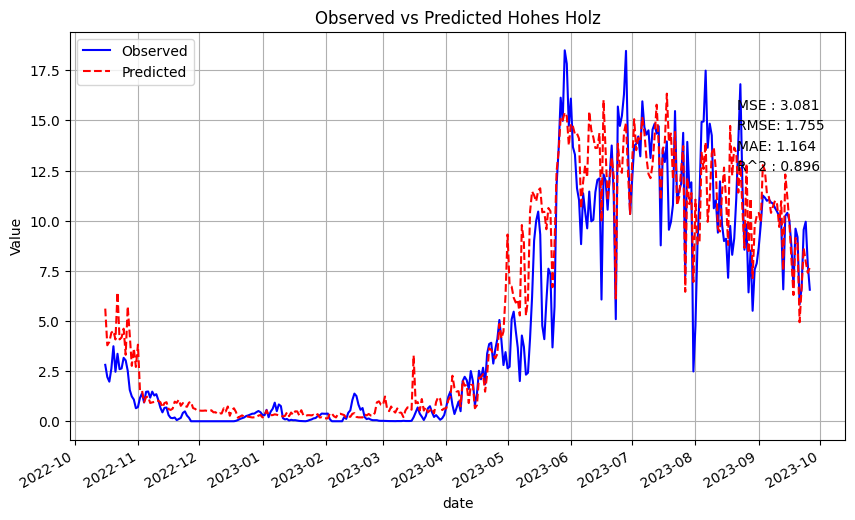

[('LE_F_MDS', 0.63909215), ('SW_IN_F', 0.08282225), ('EVI', 0.070918575), ('EVI2', 0.050744493), ('LSWI', 0.03245559), ('MNDVI', 0.017963067), ('H_F_MDS', 0.017204102), ('NDVI', 0.014813406), ('VPD_F', 0.013161486), ('MNDWI', 0.012280765), ('NDII', 0.012208106), ('LW_IN_F', 0.010535531), ('CLr', 0.008493598), ('TA_F', 0.006347986), ('PA_F', 0.0042505357), ('P_F', 0.0034157964), ('WS_F', 0.0032926083)]


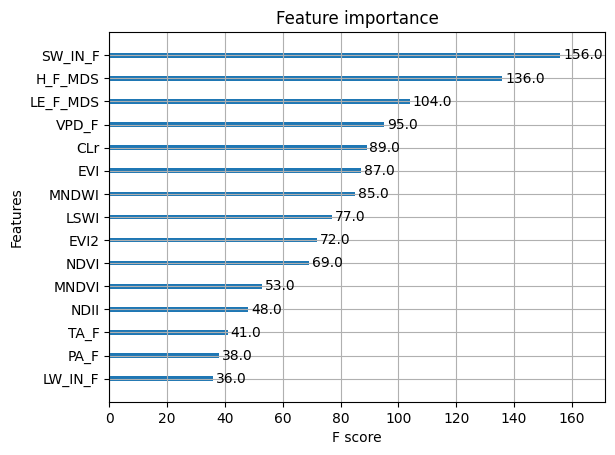

Retraining the model on the second site
Mean Squared Error: 1.075570030756819
Root Mean Squared Error: 1.037096924475634
MAE: 0.5883141430567786
Test R^2 Score: 0.8772716698164713
[('CLr', 0.6665222), ('LE_F_MDS', 0.110747546), ('MNDVI', 0.041967124), ('SW_IN_F', 0.026197093), ('MNDWI', 0.019700691), ('NDVI', 0.016447717), ('EVI', 0.016422743), ('EVI2', 0.015713291), ('H_F_MDS', 0.014687957), ('NDII', 0.012758983), ('TA_F', 0.0123953745), ('LSWI', 0.012351269), ('LW_IN_F', 0.008229232), ('VPD_F', 0.007168682), ('PA_F', 0.006852921), ('WS_F', 0.00671006), ('P_F', 0.0051270444)]


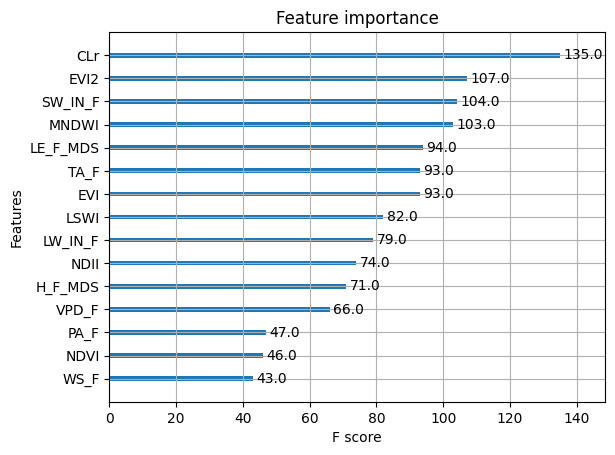

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 10.060803868678933
Root Mean Squared Error: 3.1718770260965248
MAE: 2.2512596596522005
Test R^2 Score: 0.6601064018491664


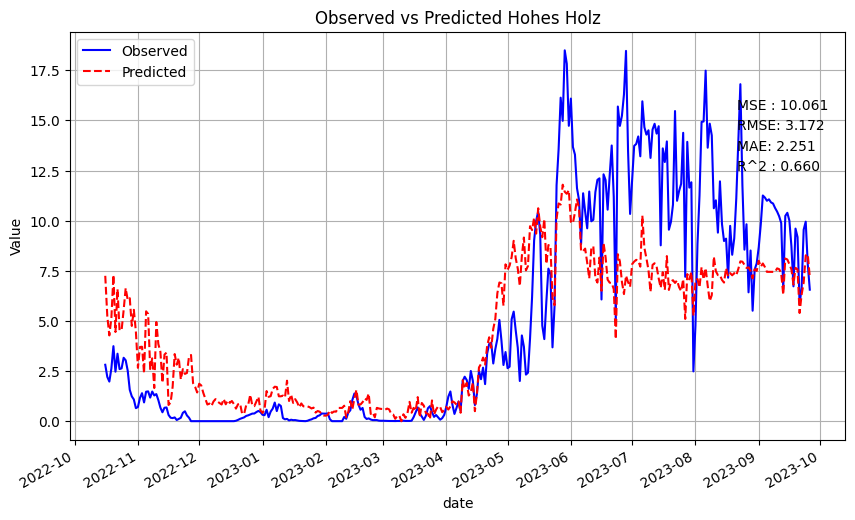

Torgnon
Mean Squared Error: 1.075570030756819
Root Mean Squared Error: 1.037096924475634
MAE: 0.5883141430567786
Test R^2 Score: 0.8772716698164713


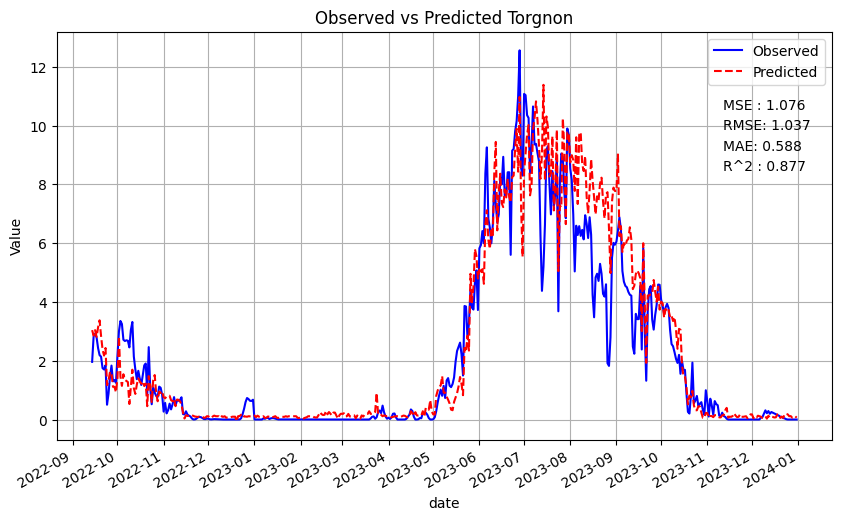

Retraining the model on the third site
Mean Squared Error: 1.5407341512011108
Root Mean Squared Error: 1.2412631273026322
MAE: 0.7771740779328599
Test R^2 Score: 0.8625421101417052
[('TA_F', 0.66763365), ('SW_IN_F', 0.106302924), ('MNDVI', 0.062450316), ('LE_F_MDS', 0.05097045), ('CLr', 0.018821985), ('LSWI', 0.015590876), ('EVI', 0.011908668), ('VPD_F', 0.010544036), ('MNDWI', 0.00954762), ('NDVI', 0.009525561), ('H_F_MDS', 0.00861468), ('EVI2', 0.008078583), ('NDII', 0.0049564894), ('LW_IN_F', 0.0045180325), ('PA_F', 0.0041554896), ('WS_F', 0.003481991), ('P_F', 0.0028985736)]


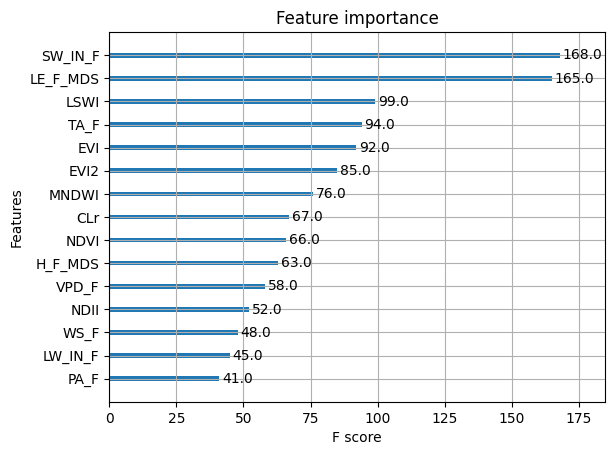

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 8.102818417727812
Root Mean Squared Error: 2.8465449966104193
mae: 2.0569725319378356
Test R^2 Score: 0.7262548656038967


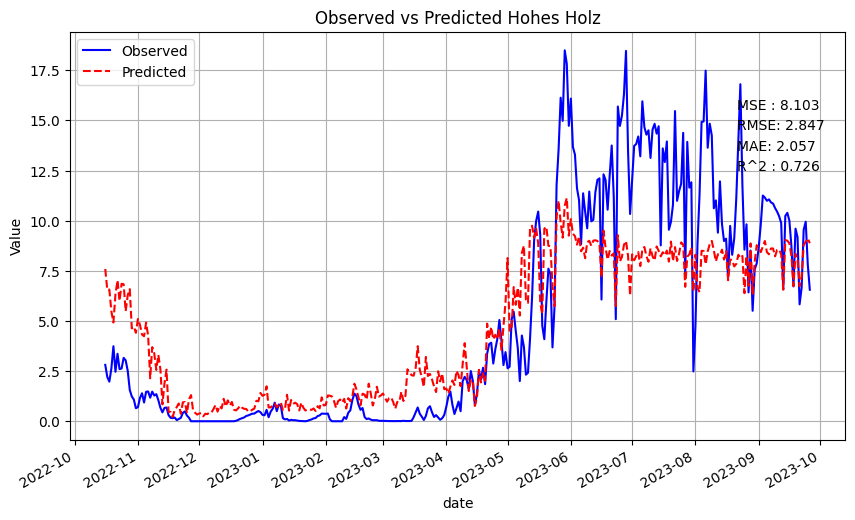

Torgnon
Mean Squared Error: 2.1118184686862285
Root Mean Squared Error: 1.4532097125625842
MAE: 1.10334462791418
Test R^2 Score: 0.7590301450383227


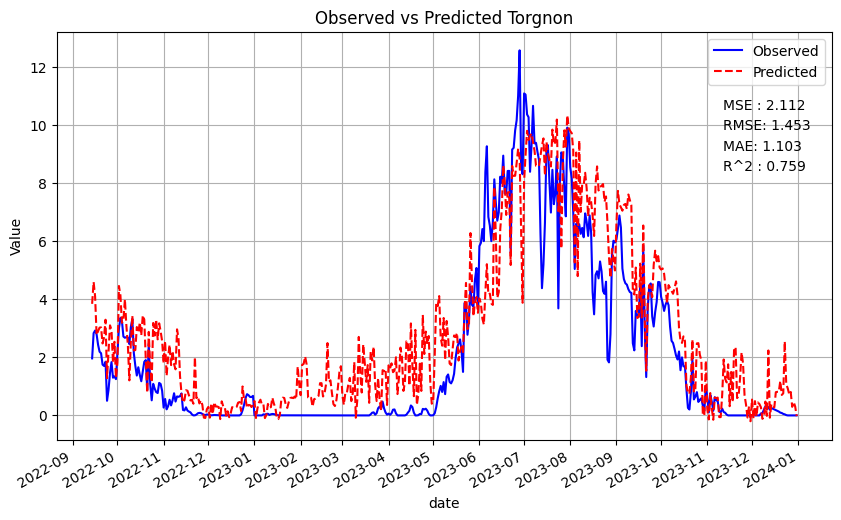

Hyytiala
Mean Squared Error: 1.5407341512011108
Root Mean Squared Error: 1.2412631273026322
MAE: 0.7771740779328599
Test R^2 Score: 0.8625421101417052


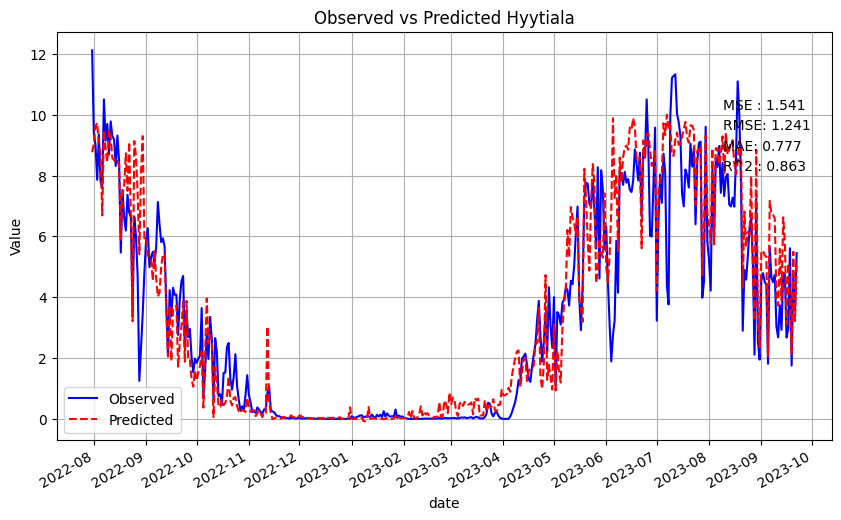

average MSE 4.10881845170009
average RMSE 1.9176548072451958
average MAE 1.4212205959220654
average R2 0.7481050518935141
Mean Squared Error: 6.280340011411347
Root Mean Squared Error: 2.506060655972107
MAE: 1.9329912639552416
Test R^2 Score: 0.7024091246113071


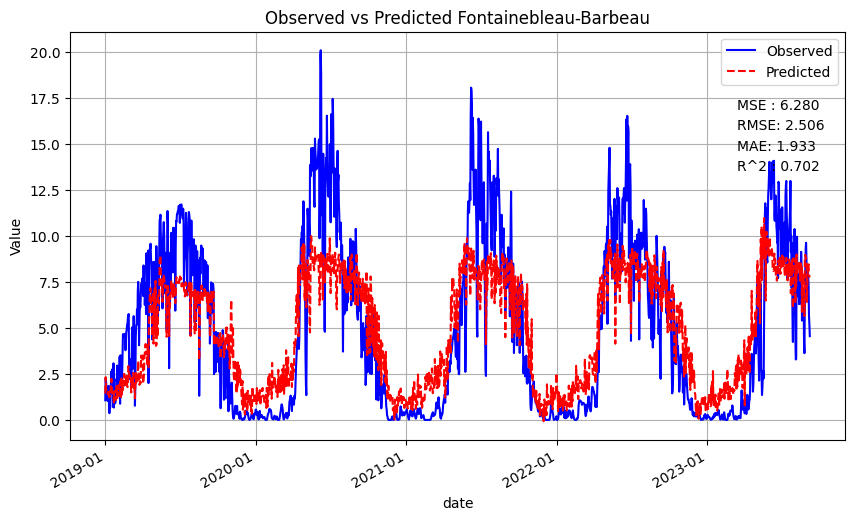

Mean Squared Error: 6.609744931031336
Root Mean Squared Error: 2.570942420792682
MAE: 1.9245735968188342
Test R^2 Score: 0.5590933343189748


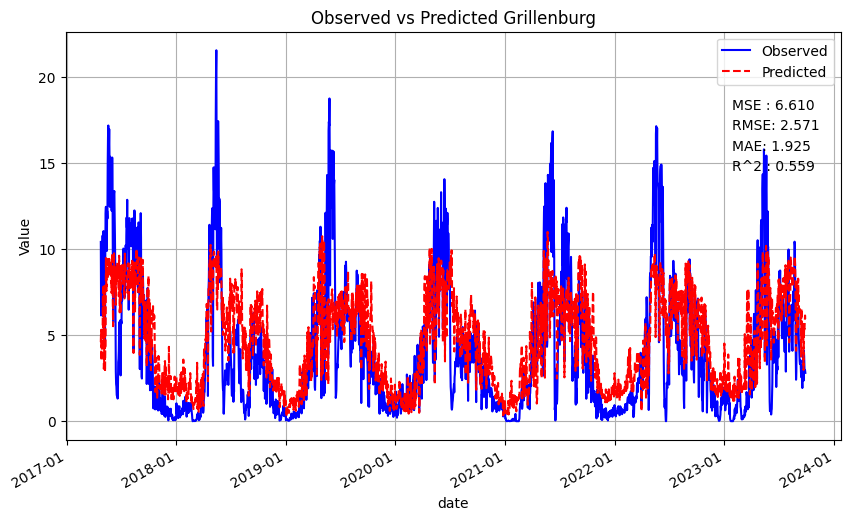

Mean Squared Error: 1.986899419059853
Root Mean Squared Error: 1.4095741977845129
MAE: 0.9234935736018738
Test R^2 Score: 0.8323582850106513


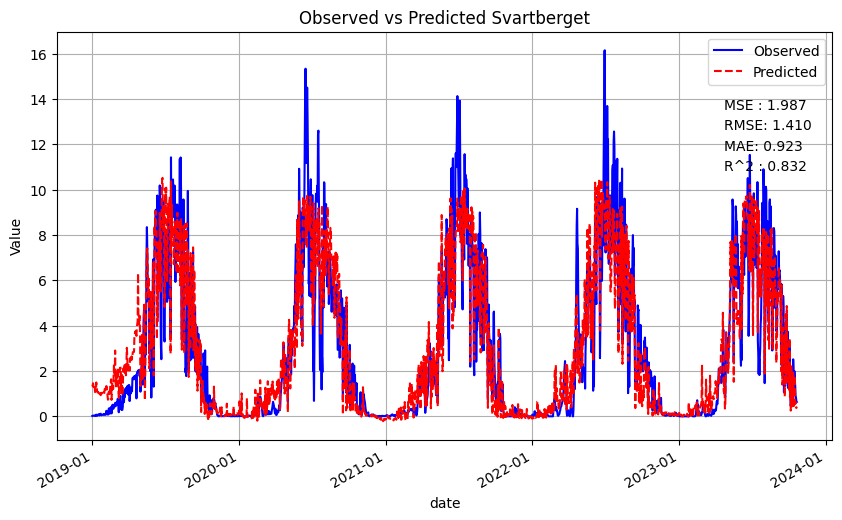

average MSE 4.958994787167512
average RMSE 2.1621924248497675
average MAE 1.5936861447919835
average R2 0.6979535813136444


In [19]:
# Columns used for features
column = col2

# Parameters needed for XGBOOST
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}"
print(params)
model, features = retrain_XGBOOST_3(files,column, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all_3(model,params,column)

retrain 3 sites then test it in 4 sites and using L=1

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1
First training and testing the model on the first site


Mean Squared Error: 3.0808880812800132
Root Mean Squared Error: 1.755245874879076
MAE: 1.1636449075118678
Test R^2 Score: 0.8959154607211537


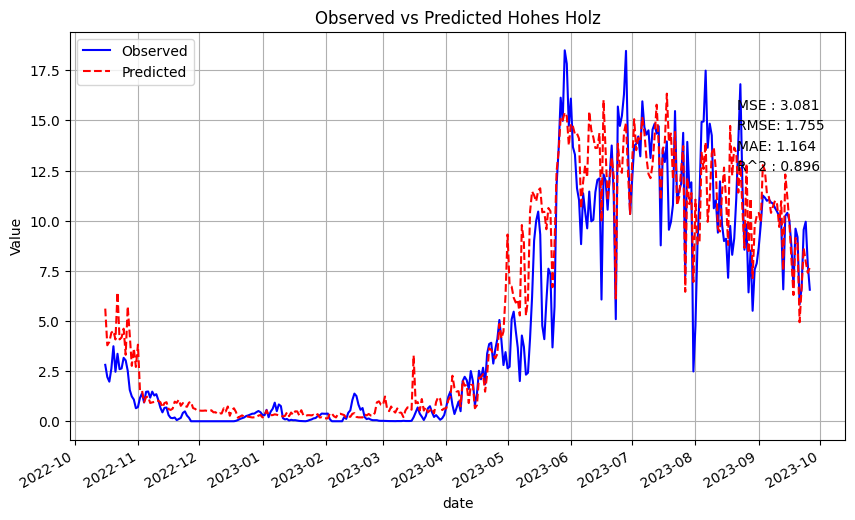

[('LE_F_MDS', 0.63909215), ('SW_IN_F', 0.08282225), ('EVI', 0.070918575), ('EVI2', 0.050744493), ('LSWI', 0.03245559), ('MNDVI', 0.017963067), ('H_F_MDS', 0.017204102), ('NDVI', 0.014813406), ('VPD_F', 0.013161486), ('MNDWI', 0.012280765), ('NDII', 0.012208106), ('LW_IN_F', 0.010535531), ('CLr', 0.008493598), ('TA_F', 0.006347986), ('PA_F', 0.0042505357), ('P_F', 0.0034157964), ('WS_F', 0.0032926083)]


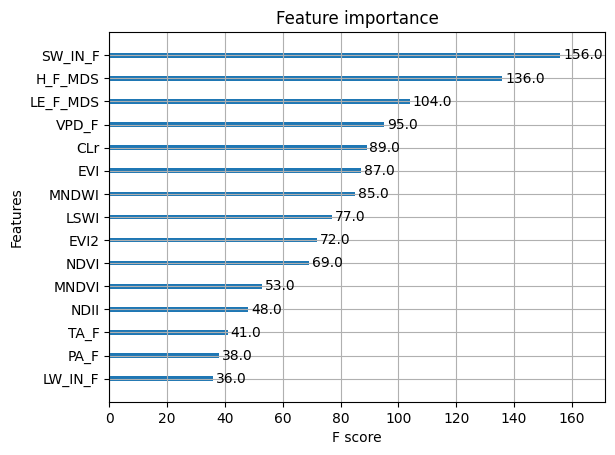

Retraining the model on the second site
Mean Squared Error: 1.075570030756819
Root Mean Squared Error: 1.037096924475634
MAE: 0.5883141430567786
Test R^2 Score: 0.8772716698164713
[('CLr', 0.6665222), ('LE_F_MDS', 0.110747546), ('MNDVI', 0.041967124), ('SW_IN_F', 0.026197093), ('MNDWI', 0.019700691), ('NDVI', 0.016447717), ('EVI', 0.016422743), ('EVI2', 0.015713291), ('H_F_MDS', 0.014687957), ('NDII', 0.012758983), ('TA_F', 0.0123953745), ('LSWI', 0.012351269), ('LW_IN_F', 0.008229232), ('VPD_F', 0.007168682), ('PA_F', 0.006852921), ('WS_F', 0.00671006), ('P_F', 0.0051270444)]


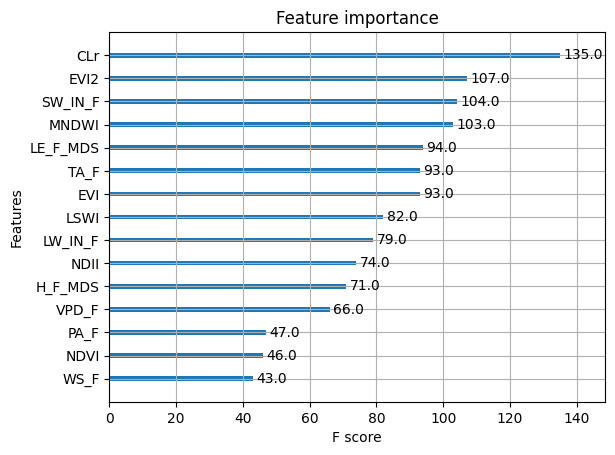

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 10.060803868678933
Root Mean Squared Error: 3.1718770260965248
MAE: 2.2512596596522005
Test R^2 Score: 0.6601064018491664


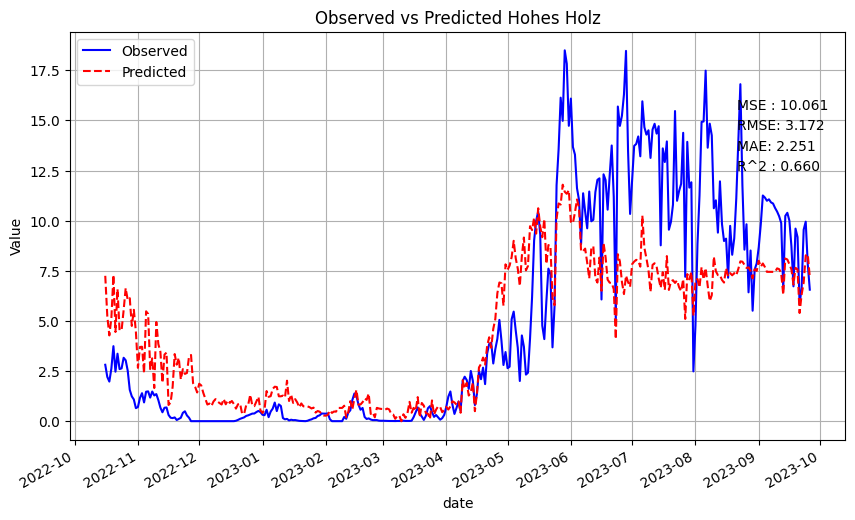

Torgnon
Mean Squared Error: 1.075570030756819
Root Mean Squared Error: 1.037096924475634
MAE: 0.5883141430567786
Test R^2 Score: 0.8772716698164713


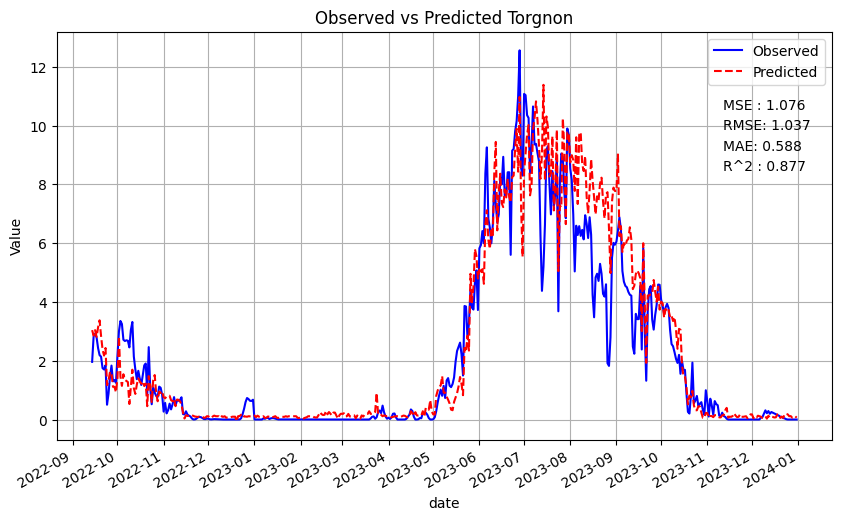

Retraining the model on the third site
Mean Squared Error: 1.5407341512011108
Root Mean Squared Error: 1.2412631273026322
MAE: 0.7771740779328599
Test R^2 Score: 0.8625421101417052
[('TA_F', 0.66763365), ('SW_IN_F', 0.106302924), ('MNDVI', 0.062450316), ('LE_F_MDS', 0.05097045), ('CLr', 0.018821985), ('LSWI', 0.015590876), ('EVI', 0.011908668), ('VPD_F', 0.010544036), ('MNDWI', 0.00954762), ('NDVI', 0.009525561), ('H_F_MDS', 0.00861468), ('EVI2', 0.008078583), ('NDII', 0.0049564894), ('LW_IN_F', 0.0045180325), ('PA_F', 0.0041554896), ('WS_F', 0.003481991), ('P_F', 0.0028985736)]


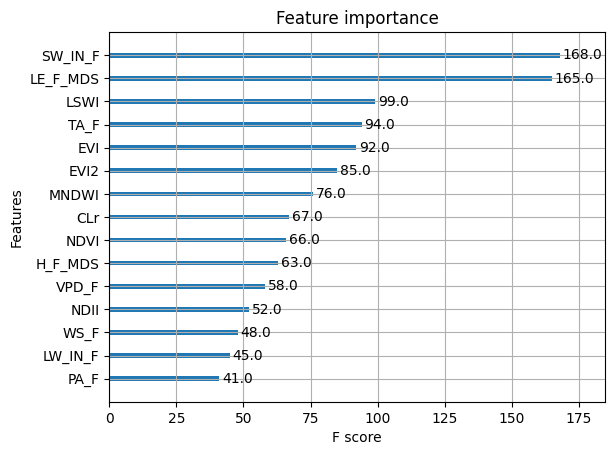

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 8.102818417727812
Root Mean Squared Error: 2.8465449966104193
mae: 2.0569725319378356
Test R^2 Score: 0.7262548656038967


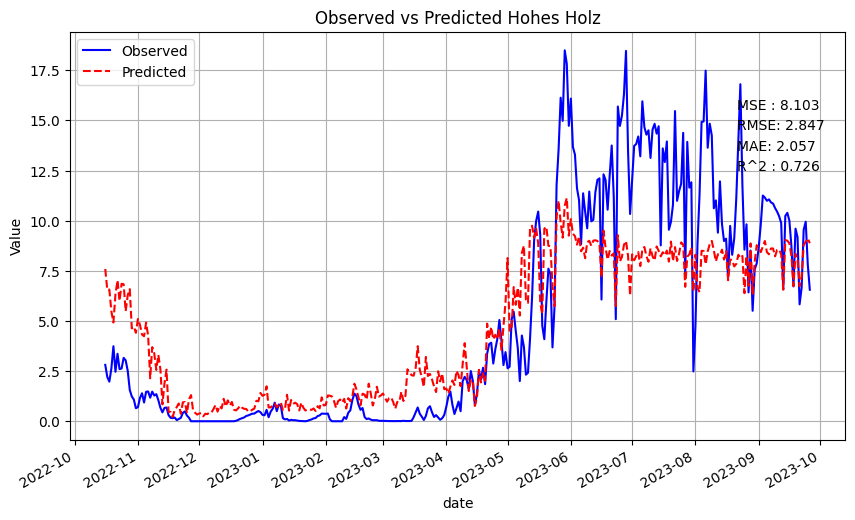

Torgnon
Mean Squared Error: 2.1118184686862285
Root Mean Squared Error: 1.4532097125625842
MAE: 1.10334462791418
Test R^2 Score: 0.7590301450383227


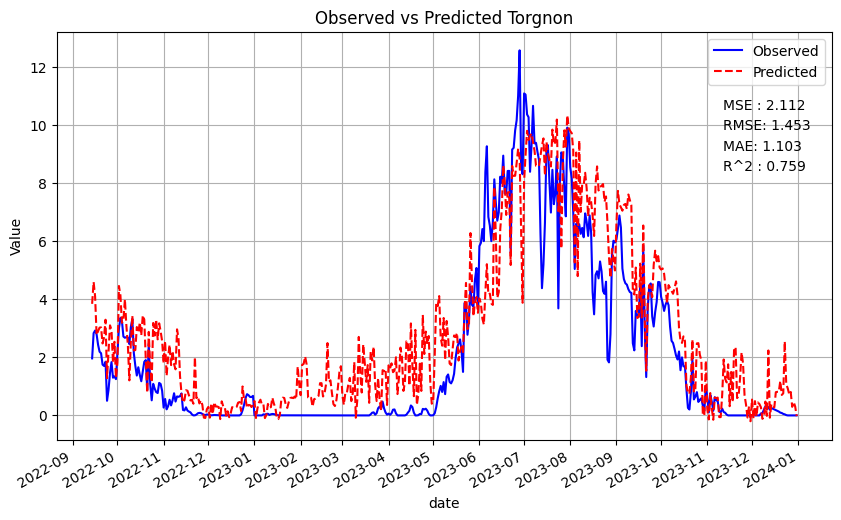

Hyytiala
Mean Squared Error: 1.5407341512011108
Root Mean Squared Error: 1.2412631273026322
MAE: 0.7771740779328599
Test R^2 Score: 0.8625421101417052


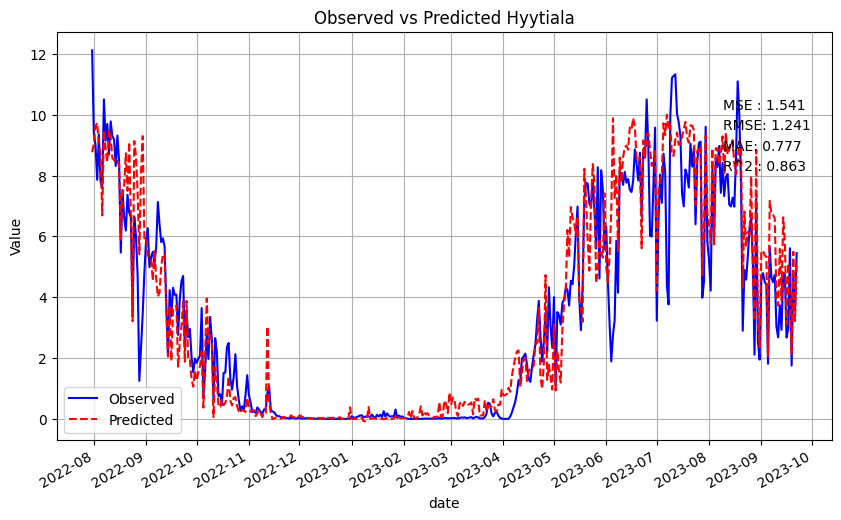

average MSE 4.10881845170009
average RMSE 1.9176548072451958
average MAE 1.4212205959220654
average R2 0.7481050518935141
Mean Squared Error: 6.280340011411347
Root Mean Squared Error: 2.506060655972107
MAE: 1.9329912639552416
Test R^2 Score: 0.7024091246113071


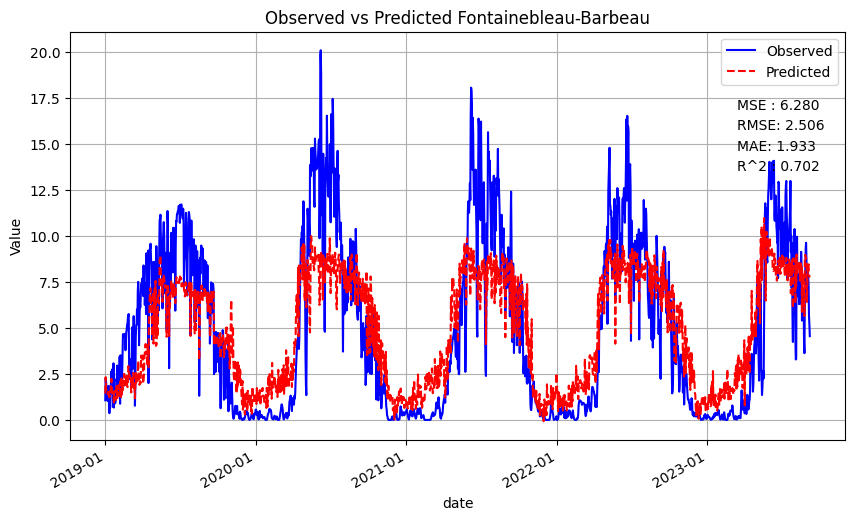

Mean Squared Error: 6.609744931031336
Root Mean Squared Error: 2.570942420792682
MAE: 1.9245735968188342
Test R^2 Score: 0.5590933343189748


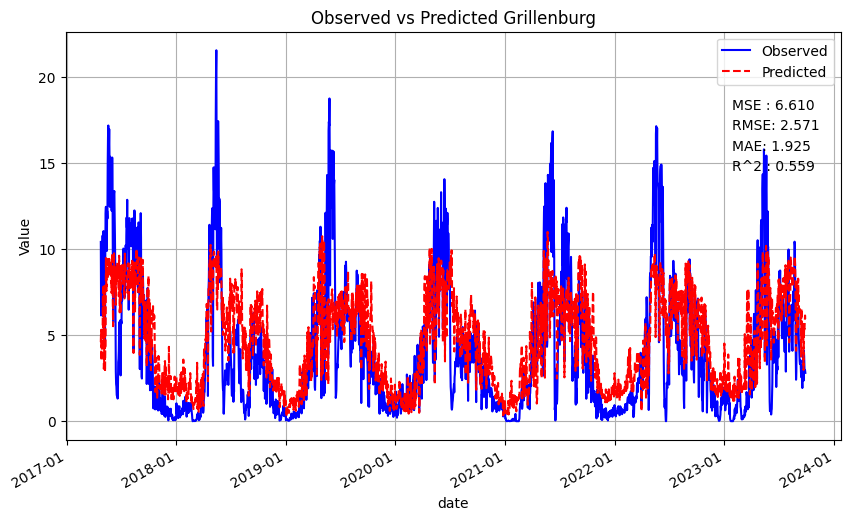

Mean Squared Error: 9.012254273289143
Root Mean Squared Error: 3.002041684135839
MAE: 2.1815809342907793
Test R^2 Score: 0.4970752219805584


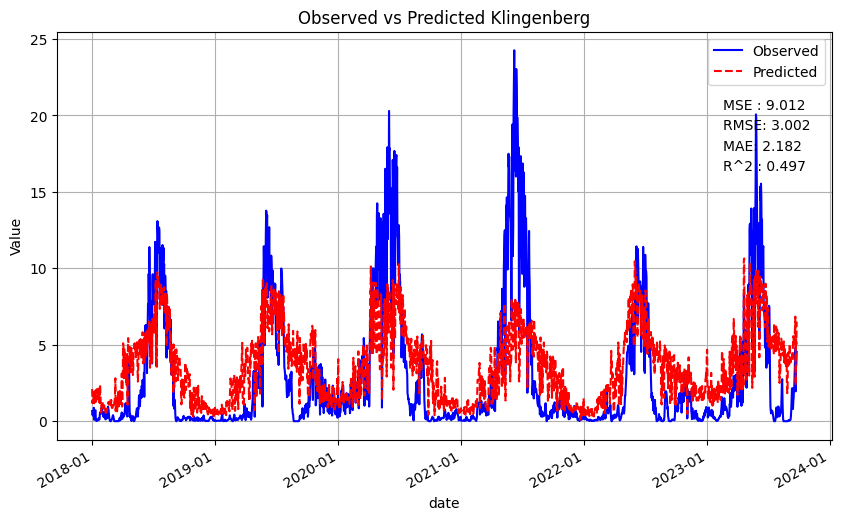

Mean Squared Error: 1.986899419059853
Root Mean Squared Error: 1.4095741977845129
MAE: 0.9234935736018738
Test R^2 Score: 0.8323582850106513


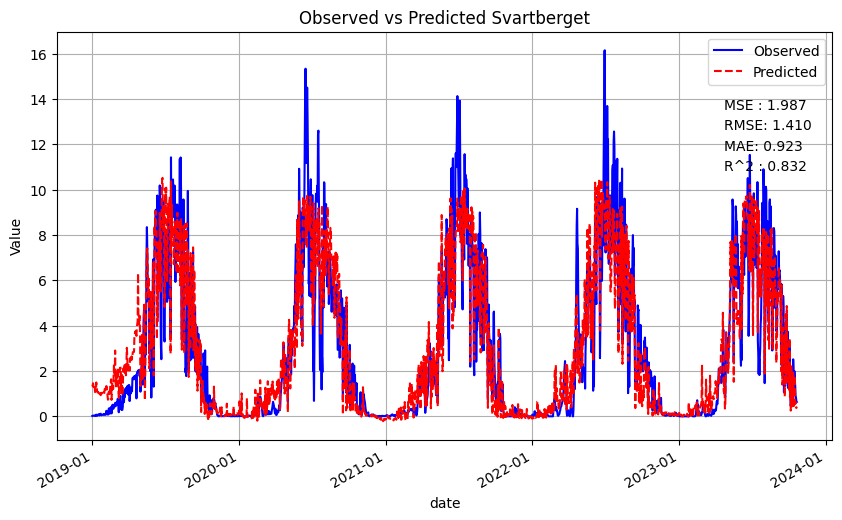

average MSE 5.97230965869792
average RMSE 2.3721547396712857
average MAE 1.7406598421666823
average R2 0.6477339914803729


In [16]:
# Columns used for features
column = col2

# Parameters needed for XGBOOST
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}"
print(params)
model, features = retrain_XGBOOST_3(files,column, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all(model,params,column)

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1
First training and testing the model on the first site
Mean Squared Error: 3.0808880812800132
Root Mean Squared Error: 1.755245874879076
MAE: 1.1636449075118678
Test R^2 Score: 0.8959154607211537


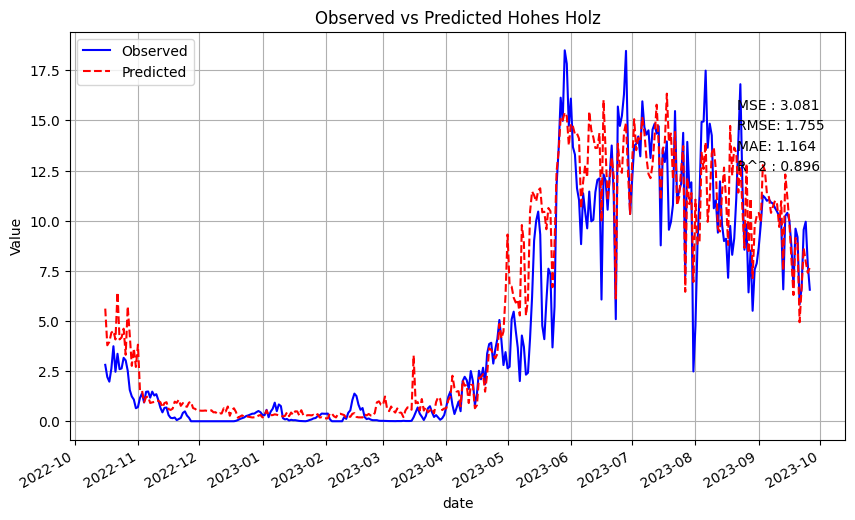

[('LE_F_MDS', 0.63909215), ('SW_IN_F', 0.08282225), ('EVI', 0.070918575), ('EVI2', 0.050744493), ('LSWI', 0.03245559), ('MNDVI', 0.017963067), ('H_F_MDS', 0.017204102), ('NDVI', 0.014813406), ('VPD_F', 0.013161486), ('MNDWI', 0.012280765), ('NDII', 0.012208106), ('LW_IN_F', 0.010535531), ('CLr', 0.008493598), ('TA_F', 0.006347986), ('PA_F', 0.0042505357), ('P_F', 0.0034157964), ('WS_F', 0.0032926083)]


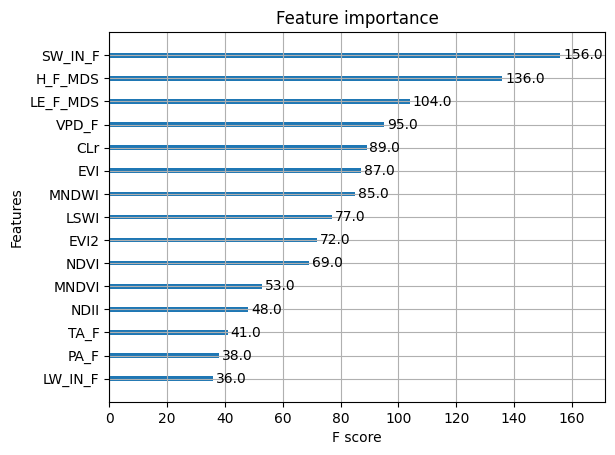

Retraining the model on the second site
Mean Squared Error: 8.102270327837532
Root Mean Squared Error: 2.8464487221514343
MAE: 1.7689589943500341
Test R^2 Score: 0.5663541723314689
[('LE_F_MDS', 0.5081453), ('MNDVI', 0.2333388), ('CLr', 0.030734587), ('SW_IN_F', 0.029898012), ('EVI2', 0.025816018), ('MNDWI', 0.024155926), ('NDII', 0.019677406), ('TA_F', 0.018951366), ('VPD_F', 0.017354596), ('NDVI', 0.015600961), ('LSWI', 0.01542569), ('H_F_MDS', 0.0145104965), ('LW_IN_F', 0.013141884), ('EVI', 0.011388473), ('P_F', 0.008975371), ('WS_F', 0.008950203), ('PA_F', 0.0039349543)]


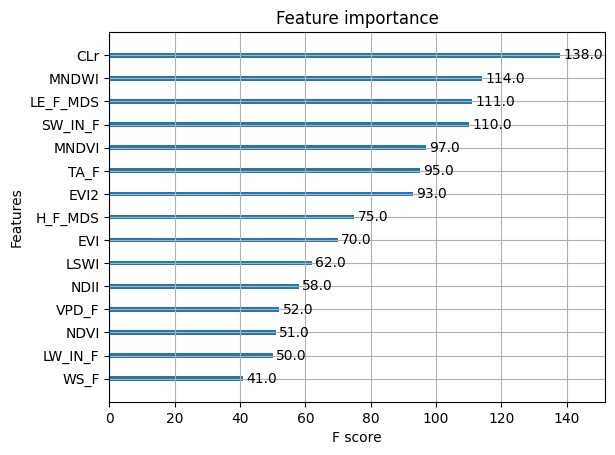

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 6.654118498001467
Root Mean Squared Error: 2.5795578105561945
MAE: 2.1429095068119217
Test R^2 Score: 0.7751976573314595


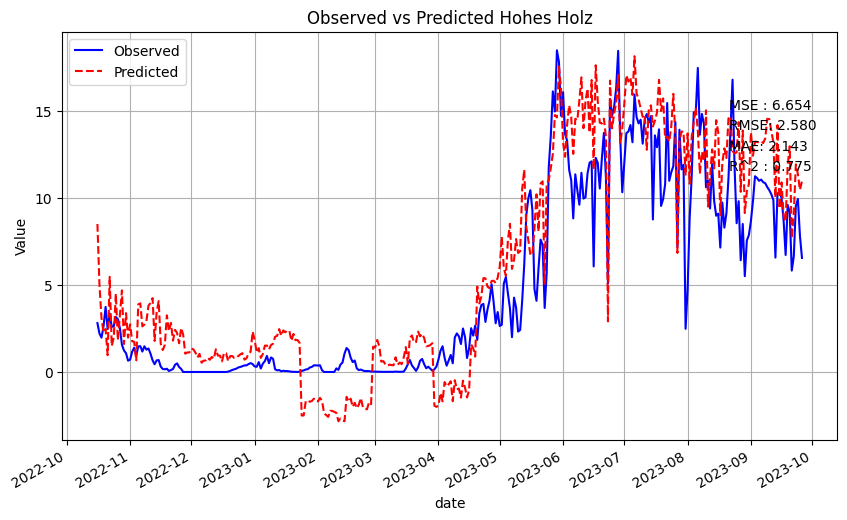

Estrees-Mons A28
Mean Squared Error: 8.102270327837532
Root Mean Squared Error: 2.8464487221514343
MAE: 1.7689589943500341
Test R^2 Score: 0.5663541723314689


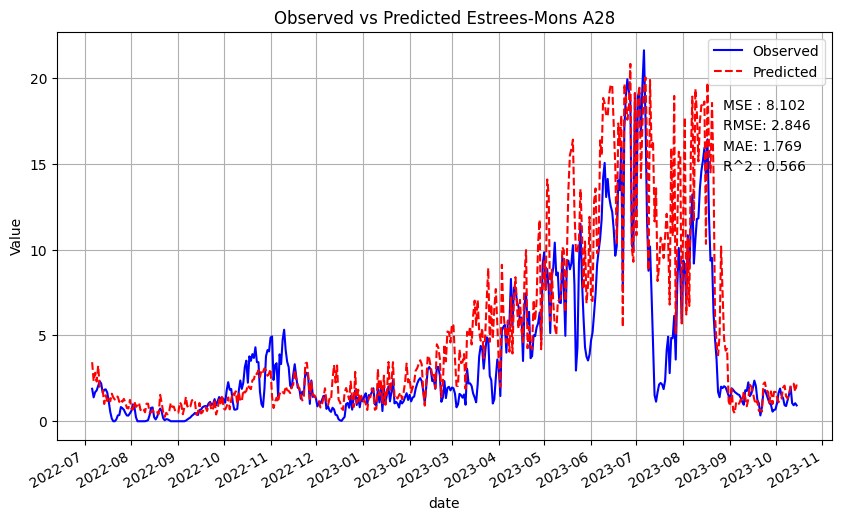

Retraining the model on the third site
Mean Squared Error: 1.075570030756819
Root Mean Squared Error: 1.037096924475634
MAE: 0.5883141430567786
Test R^2 Score: 0.8772716698164713
[('CLr', 0.6665222), ('LE_F_MDS', 0.110747546), ('MNDVI', 0.041967124), ('SW_IN_F', 0.026197093), ('MNDWI', 0.019700691), ('NDVI', 0.016447717), ('EVI', 0.016422743), ('EVI2', 0.015713291), ('H_F_MDS', 0.014687957), ('NDII', 0.012758983), ('TA_F', 0.0123953745), ('LSWI', 0.012351269), ('LW_IN_F', 0.008229232), ('VPD_F', 0.007168682), ('PA_F', 0.006852921), ('WS_F', 0.00671006), ('P_F', 0.0051270444)]


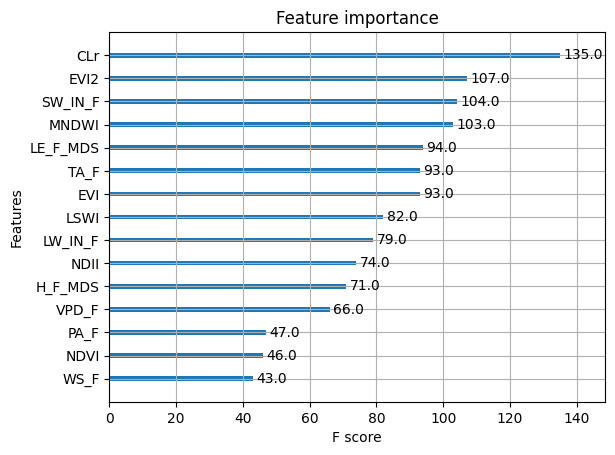

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 10.060803868678933
Root Mean Squared Error: 3.1718770260965248
mae: 2.2512596596522005
Test R^2 Score: 0.6601064018491664


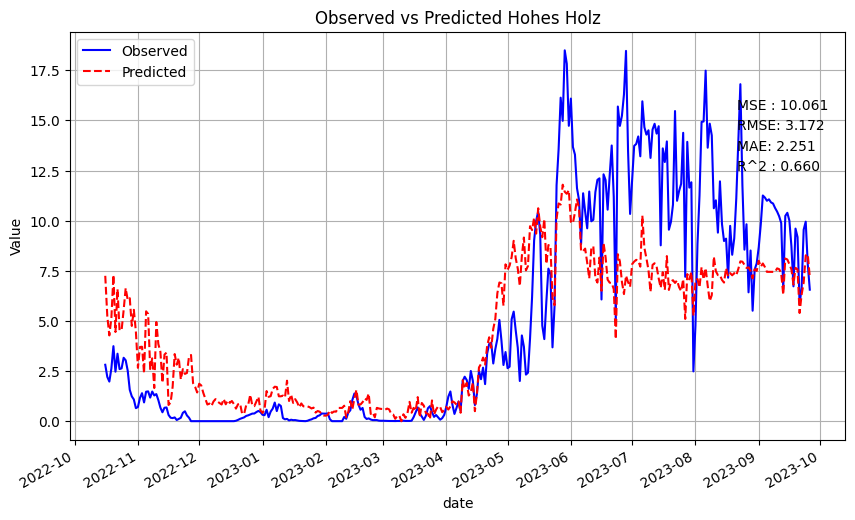

Estrees-Mons A28
Mean Squared Error: 7.802634399993051
Root Mean Squared Error: 2.793319602192533
MAE: 1.931060392148897
Test R^2 Score: 0.5823911427942932


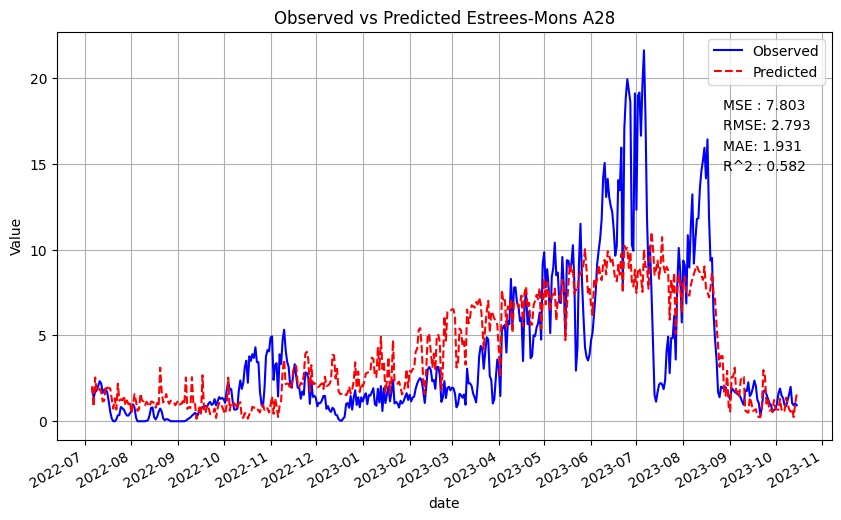

Torgnon
Mean Squared Error: 1.075570030756819
Root Mean Squared Error: 1.037096924475634
MAE: 0.5883141430567786
Test R^2 Score: 0.8772716698164713


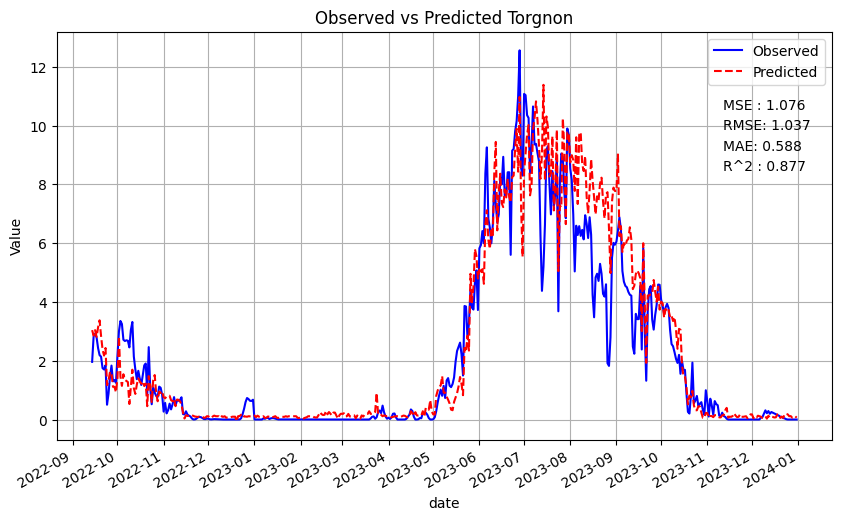

Retraining the model on the fourth site
Mean Squared Error: 1.5407341512011108
Root Mean Squared Error: 1.2412631273026322
MAE: 0.7771740779328599
Test R^2 Score: 0.8625421101417052
[('TA_F', 0.66763365), ('SW_IN_F', 0.106302924), ('MNDVI', 0.062450316), ('LE_F_MDS', 0.05097045), ('CLr', 0.018821985), ('LSWI', 0.015590876), ('EVI', 0.011908668), ('VPD_F', 0.010544036), ('MNDWI', 0.00954762), ('NDVI', 0.009525561), ('H_F_MDS', 0.00861468), ('EVI2', 0.008078583), ('NDII', 0.0049564894), ('LW_IN_F', 0.0045180325), ('PA_F', 0.0041554896), ('WS_F', 0.003481991), ('P_F', 0.0028985736)]


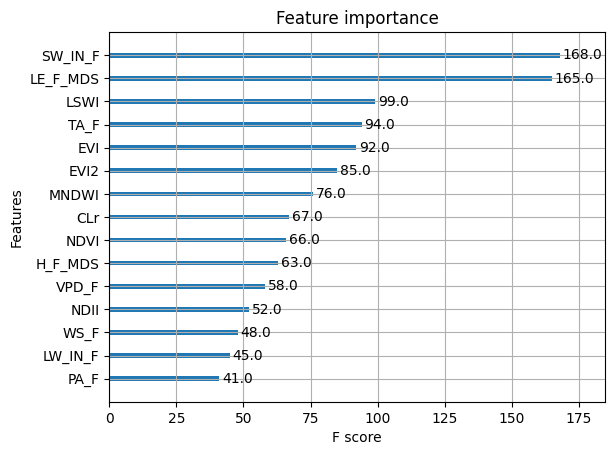

Hohes Holz
Retesting the model on the first, second, and third site
Mean Squared Error: 8.102818417727812
Root Mean Squared Error: 2.8465449966104193
MAE: 2.0569725319378356
Test R^2 Score: 0.7262548656038967


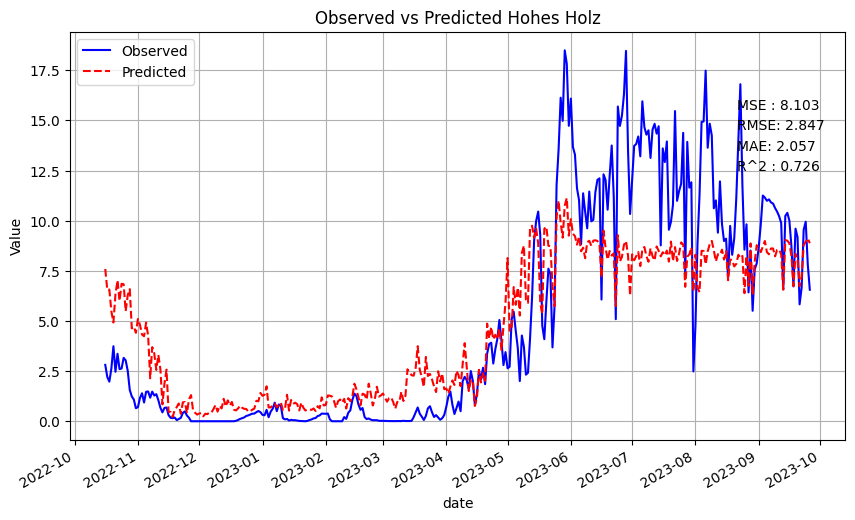

Estrees-Mons A28
Mean Squared Error: 9.016683907470071
Root Mean Squared Error: 3.002779363767853
MAE: 2.3113013248413186
Test R^2 Score: 0.5174133671587873


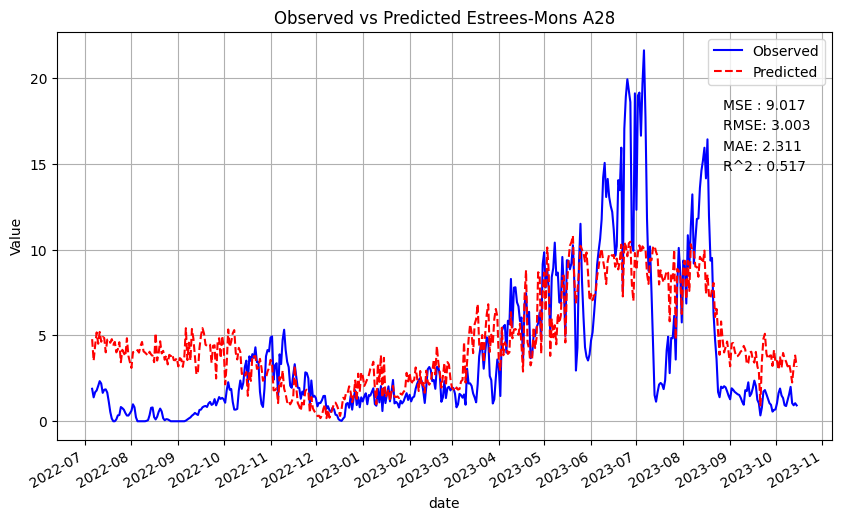

Torgnon
Mean Squared Error: 2.1118184686862285
Root Mean Squared Error: 1.4532097125625842
MAE: 1.10334462791418
Test R^2 Score: 0.7590301450383227


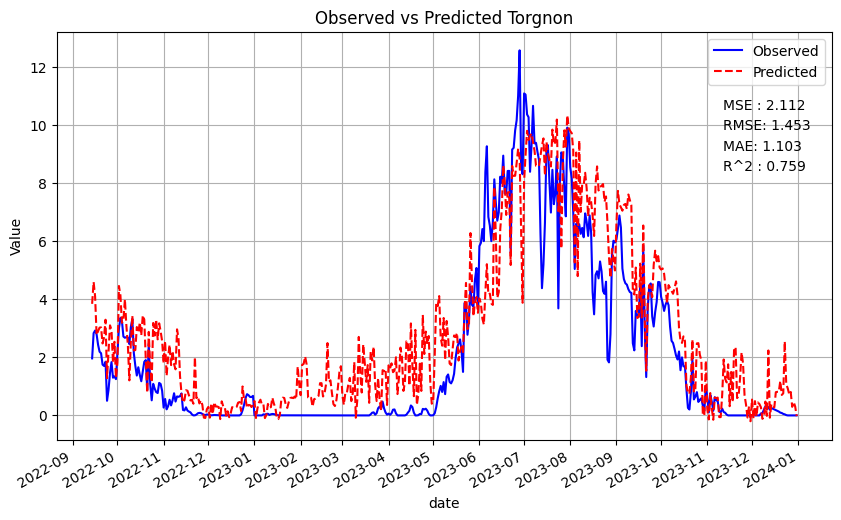

Hyytiala
Mean Squared Error: 1.5407341512011108
Root Mean Squared Error: 1.2412631273026322
MAE: 0.7771740779328599
Test R^2 Score: 0.8625421101417052


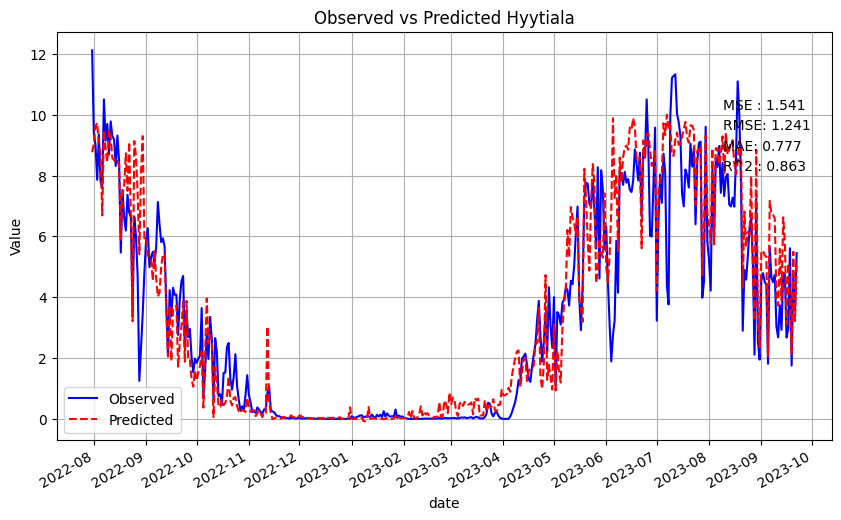

average MSE 5.193013736271305
average RMSE 2.1359493000608722
average MAE 1.5621981406565484
average R2 0.716310121985678
Mean Squared Error: 6.280340011411347
Root Mean Squared Error: 2.506060655972107
MAE: 1.9329912639552416
Test R^2 Score: 0.7024091246113071


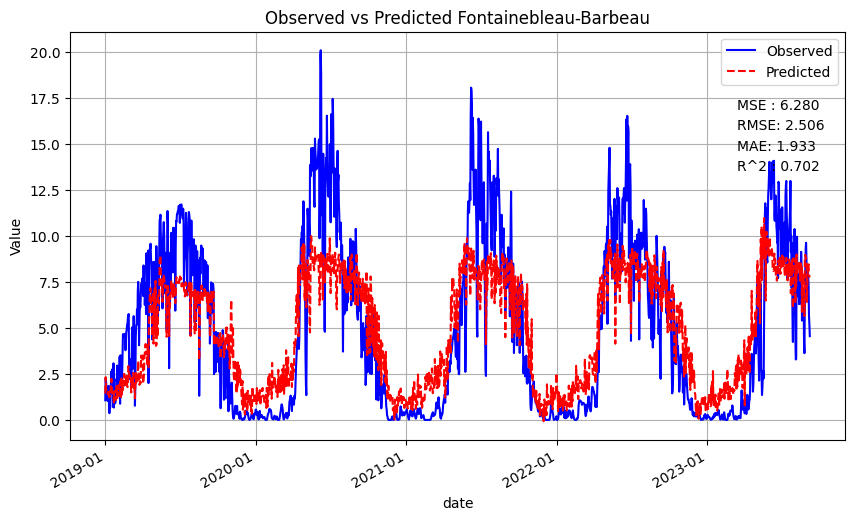

Mean Squared Error: 6.609744931031336
Root Mean Squared Error: 2.570942420792682
MAE: 1.9245735968188342
Test R^2 Score: 0.5590933343189748


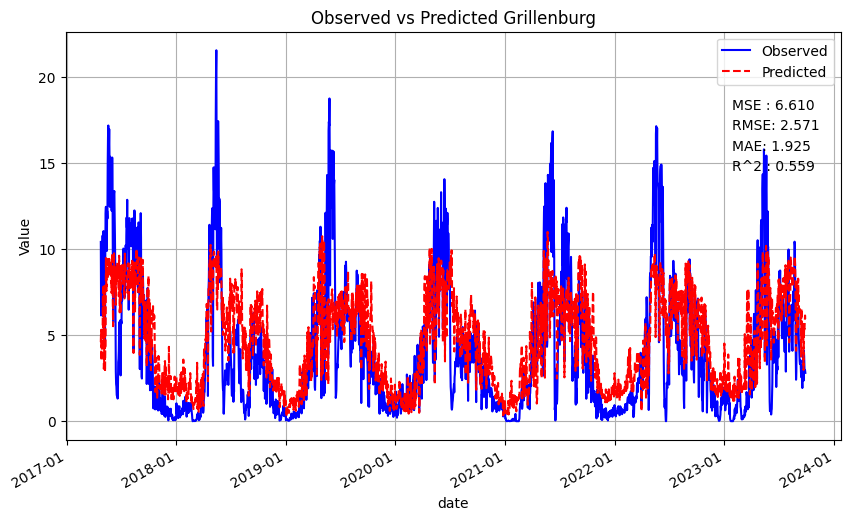

Mean Squared Error: 9.012254273289143
Root Mean Squared Error: 3.002041684135839
MAE: 2.1815809342907793
Test R^2 Score: 0.4970752219805584


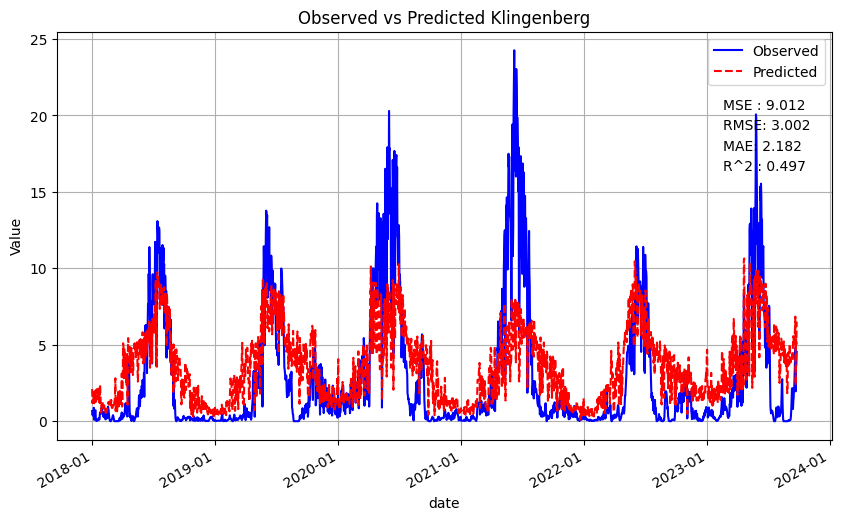

Mean Squared Error: 1.986899419059853
Root Mean Squared Error: 1.4095741977845129
MAE: 0.9234935736018738
Test R^2 Score: 0.8323582850106513


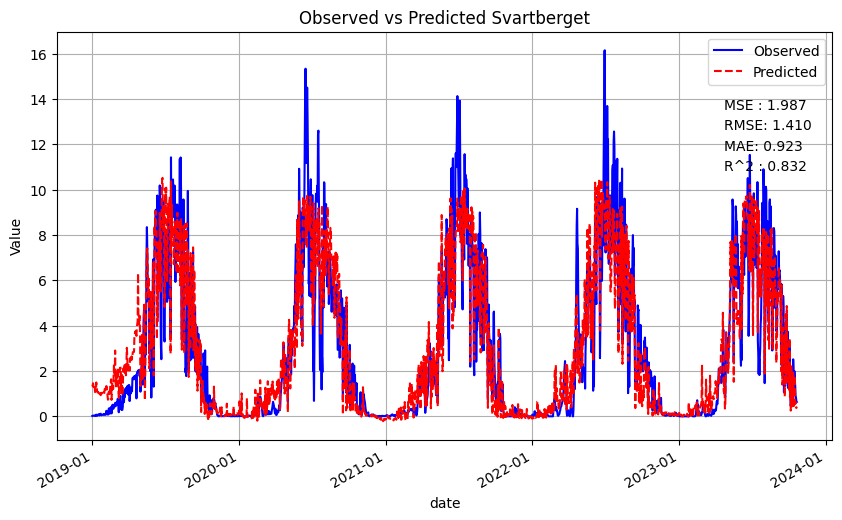

average MSE 5.97230965869792
average RMSE 2.3721547396712857
average MAE 1.7406598421666823
average R2 0.6477339914803729


In [18]:
# Columns used for features
column = col2

# Parameters needed for XGBOOST
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Estrees-Mons A28_preprocessed_26052017_15102023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}"
print(params)
model, features = retrain_XGBOOST(files,column, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all(model,params,column)